## Introduction
### This project aims to predict Apple Inc. (AAPL) stock prices using historical data and the Prophet forecasting model. By leveraging machine learning and statistical techniques, this project provides an accurate forecast of future stock prices, which can be valuable for investors, analysts, and financial enthusiasts.

Objective
The primary objective of this project is to develop a predictive model for Apple's stock prices using the Prophet model. The project involves:

   1. Data preprocessing and exploration to understand the dataset.
    Preparing the data for the Prophet model.
Training the model on historical data.
Evaluating the model's performance by comparing predictions with actual values.

In [1]:
import import_ipynb

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from prophet import Prophet
from datetime import datetime
from datetime import timedelta
from tqdm import tqdm
from statsmodels.tsa.stattools import adfuller

In [4]:
df = pd.read_csv("AAPL.csv")
print("the head of the data is:")
print(df.head())
print("the tail of the data is:")
print(df.tail())

the head of the data is:
         Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100178  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094952  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087983  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090160   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092774   73449600
the tail of the data is:
             Date        Open        High         Low       Close   Adj Close  \
10463  2022-06-13  132.869995  135.199997  131.440002  131.880005  131.880005   
10464  2022-06-14  133.130005  133.889999  131.479996  132.759995  132.759995   
10465  2022-06-15  134.289993  137.339996  132.160004  135.429993  135.429993   
10466  2022-06-16  132.080002  132.389999  129.039993  130.059998  130.059998   
10467  2022-06-17  130.070007  133.080002  129.809998  131.559998  131.559998   

       

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [6]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [7]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [9]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [10]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

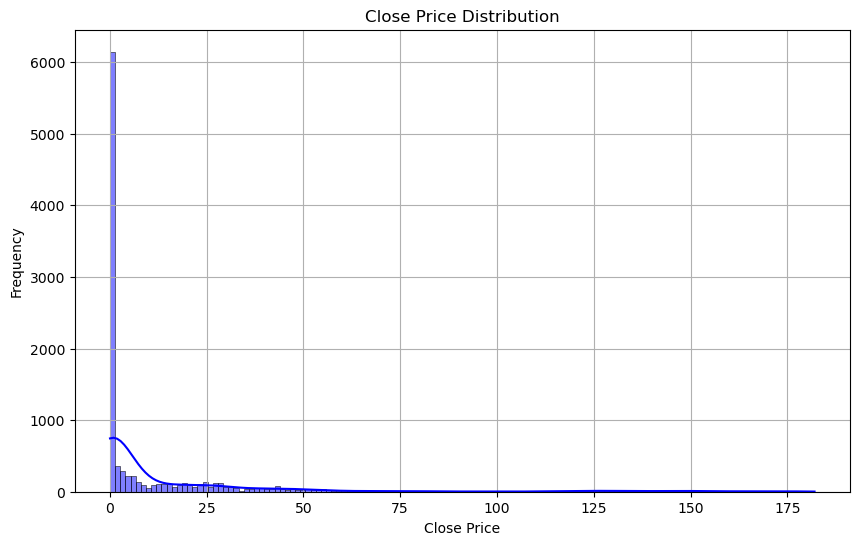

In [11]:
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.title('Close Price Distribution')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
sns.histplot(df['Close'], kde=True, color='blue')
plt.show()

1. Indicates that the majority of the Close Prices are in the range of 0 to 35
2. Significant skewed to the right

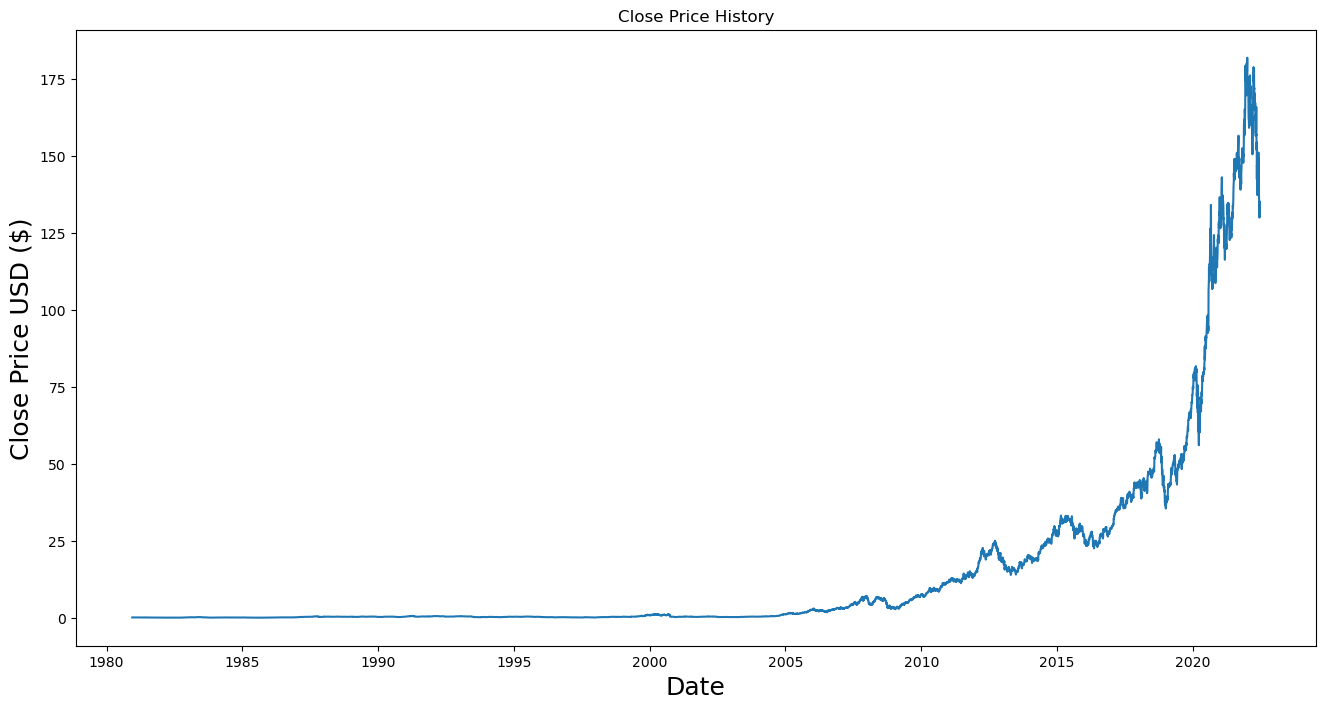

In [12]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

1. Shows how the Close Prices have changed over time
2. There is a huge uptrend since 2015 and still going.

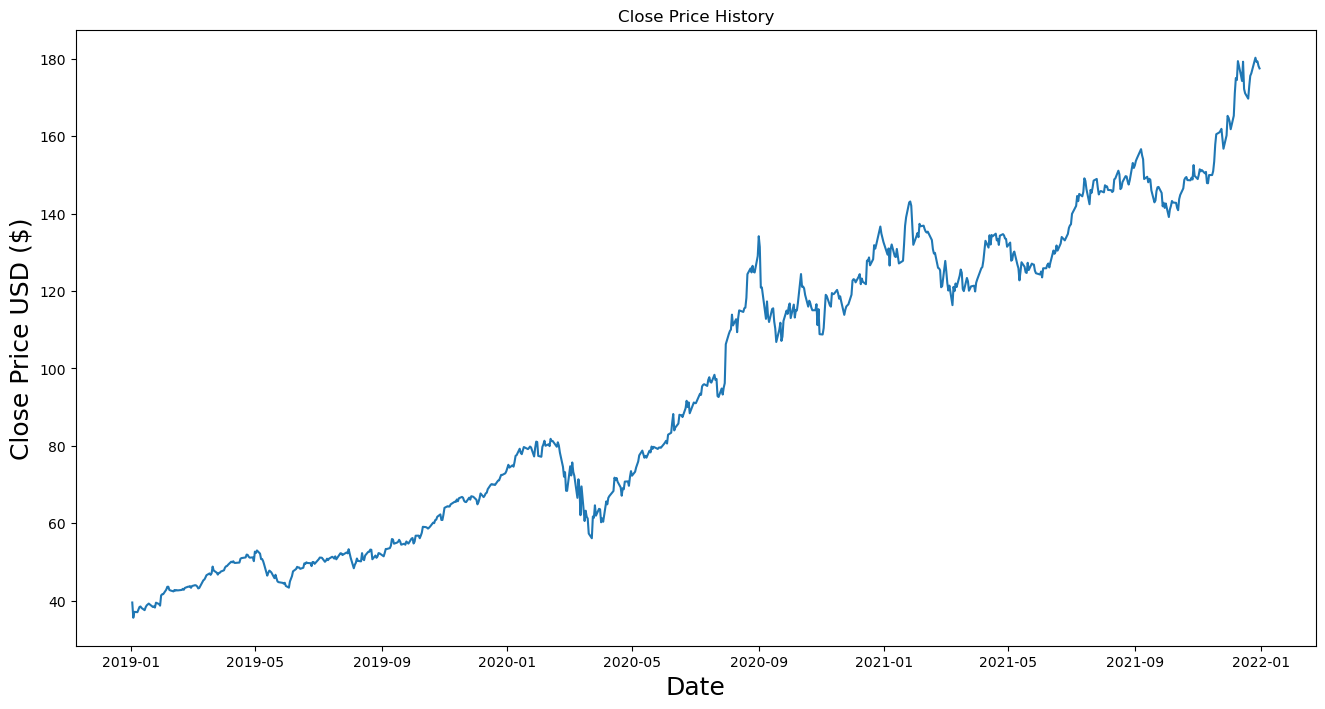

In [13]:
df_2019_2022 = df.loc['2019-01-01':'2022-01-01']
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df_2019_2022['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

1. Indicates that there has been significant fluctuation in the Close Prices (Even the apple stock market has known a decay in 2020 because of corona virus)

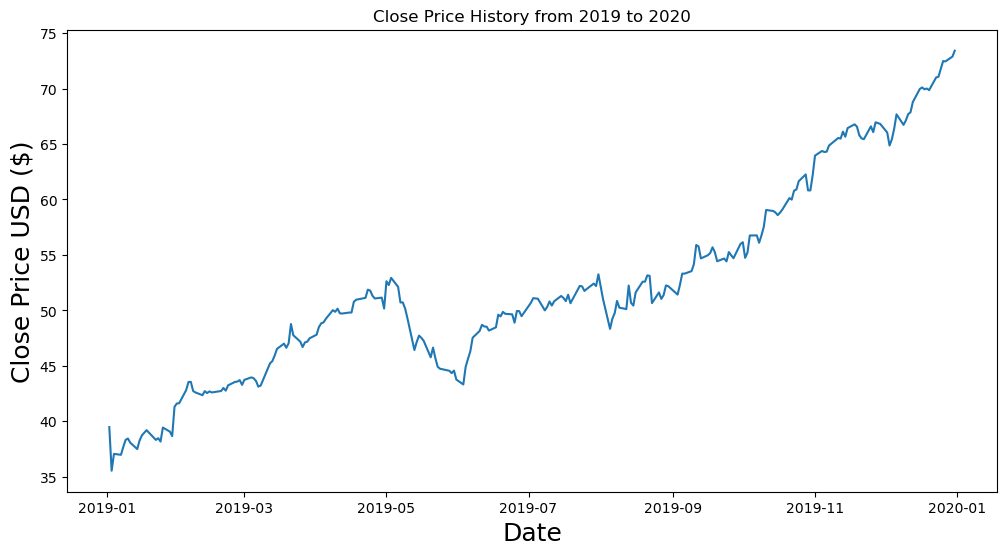

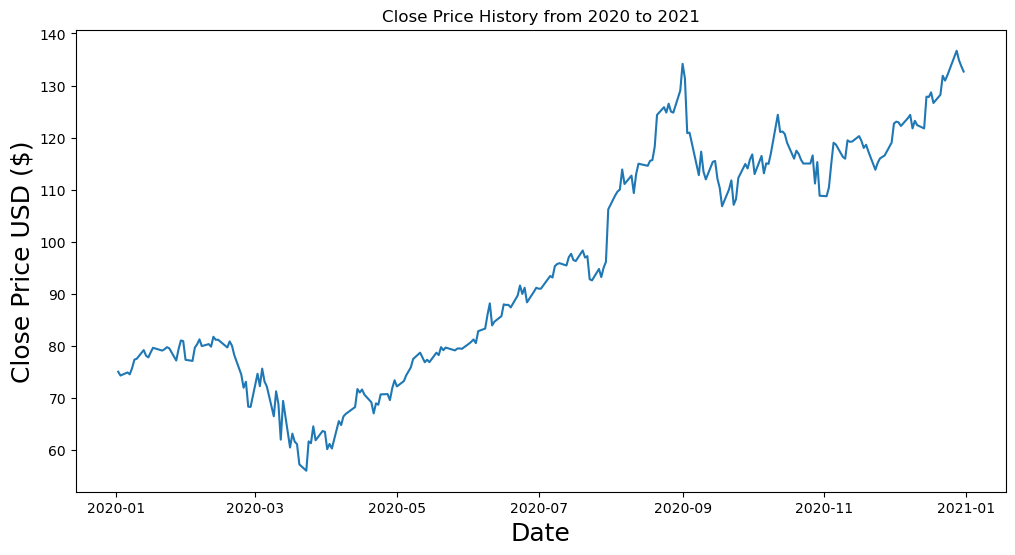

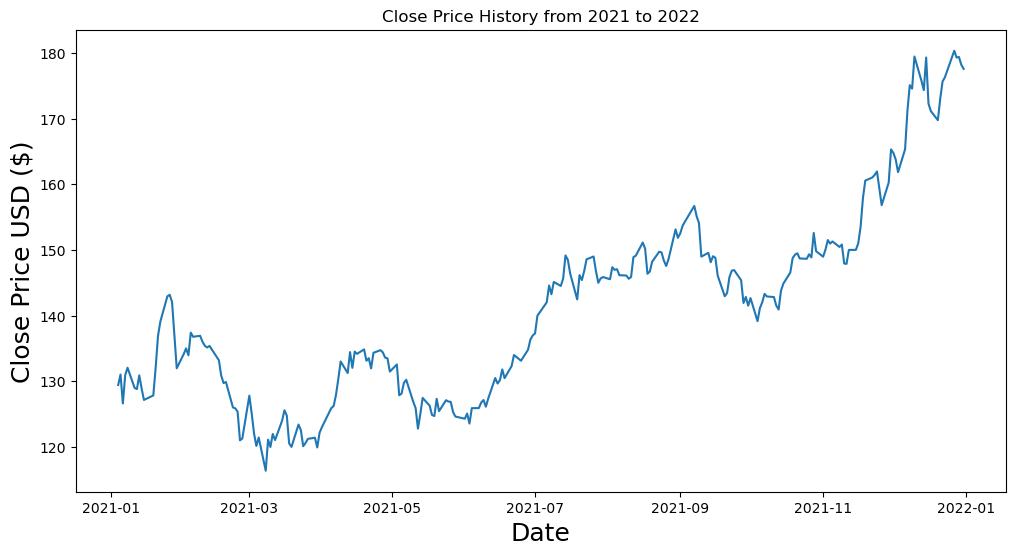

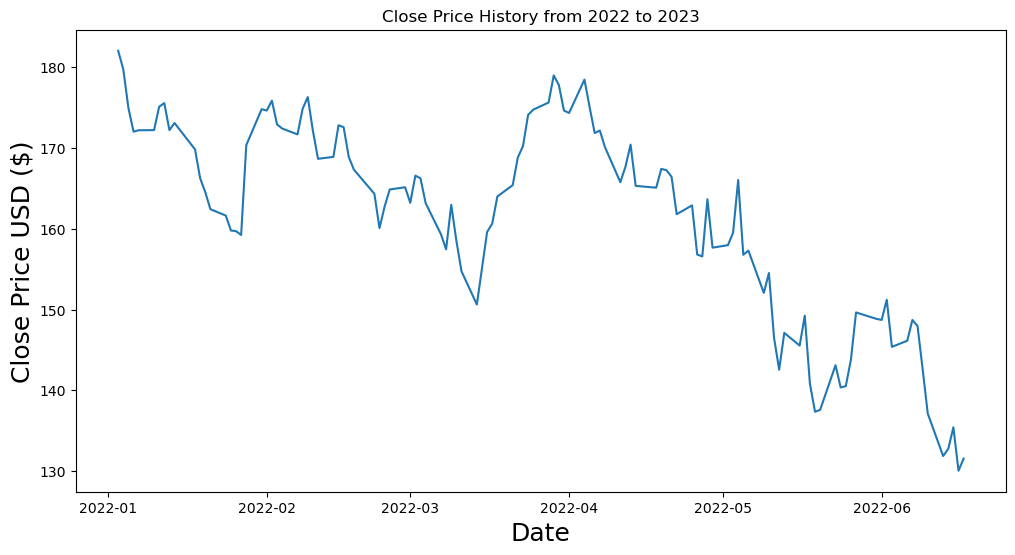

In [14]:
for year in range(2019, 2023):
    df_year = df.loc[str(year)+'-01-01':str(year+1)+'-01-01']
    plt.figure(figsize=(12,6))
    plt.title('Close Price History from '+str(year)+' to '+str(year+1))
    plt.plot(df_year['Close'])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.show()

Observing the trend over the years 2019 to 2022, it is evident that the closing price consistently increased, with the exception of the year 2022 where a deviation from this upward trajectory occurred.

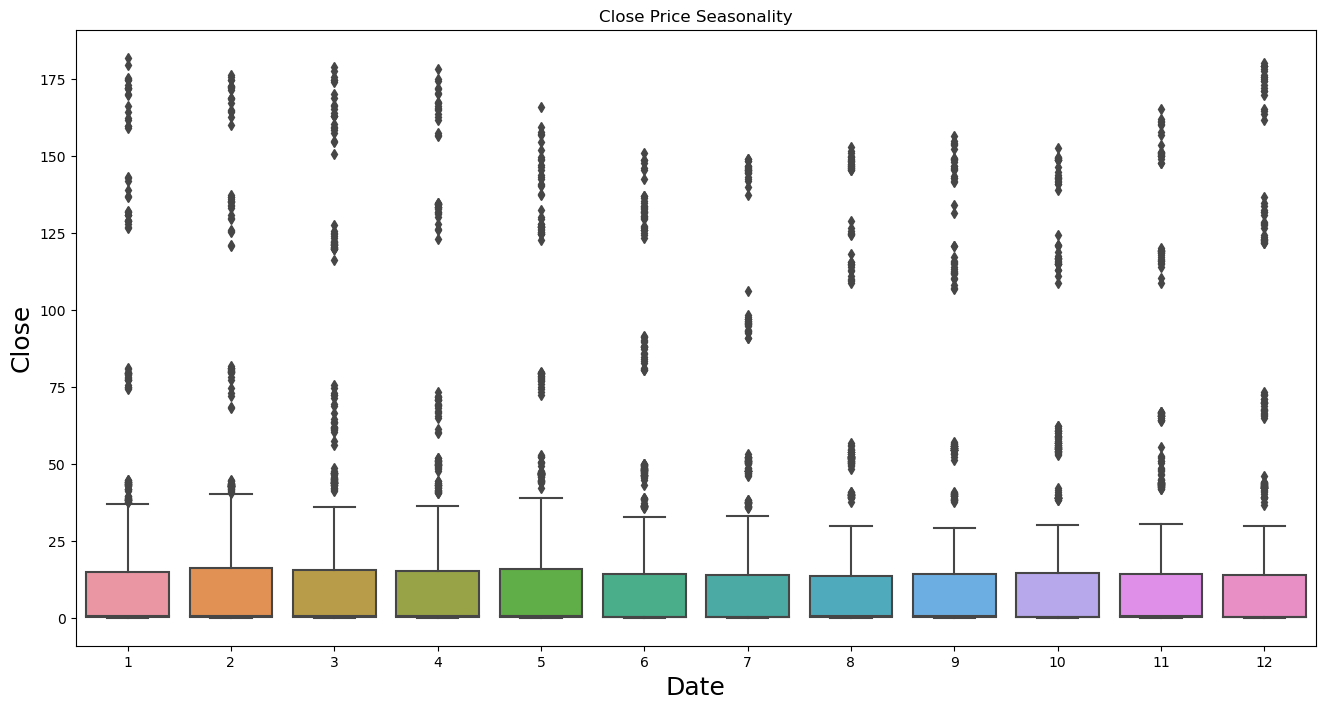

In [15]:
plt.figure(figsize=(16,8))
plt.title('Close Price Seasonality')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
sns.boxplot(data=df, x=df.index.month, y='Close')
plt.show()

The seasonality of the close price is not clear, but it seems that the close price is higher in the first half of the year than the second half of the year.

In [16]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    if dfoutput[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [17]:
adf_test(df['Close'])

Results of Dickey-Fuller Test:
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


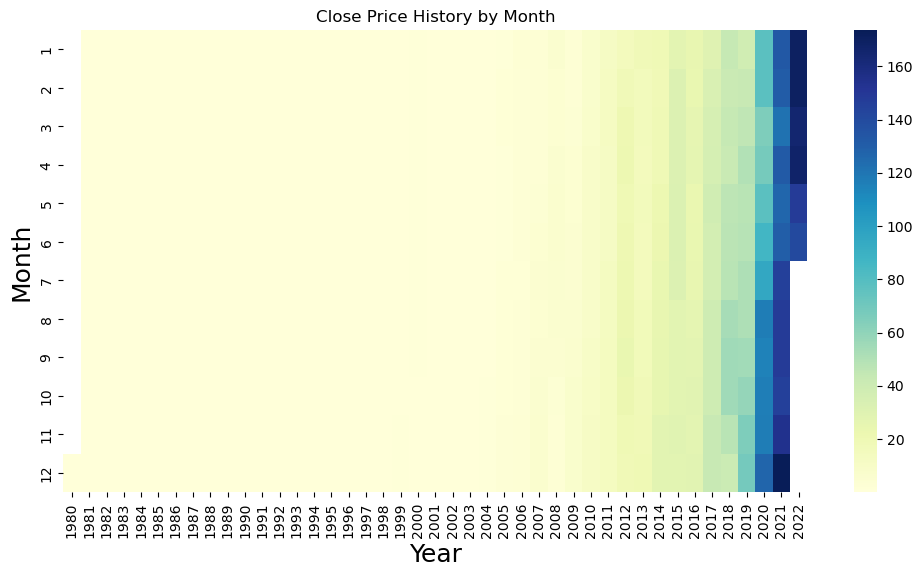

In [18]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df_pivot = df.pivot_table(index='Month', columns='Year', values='Close')
plt.figure(figsize=(12,6))
plt.title('Close Price History by Month')
sns.heatmap(df_pivot, annot=False, cmap='YlGnBu')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Month', fontsize=18)
plt.show()

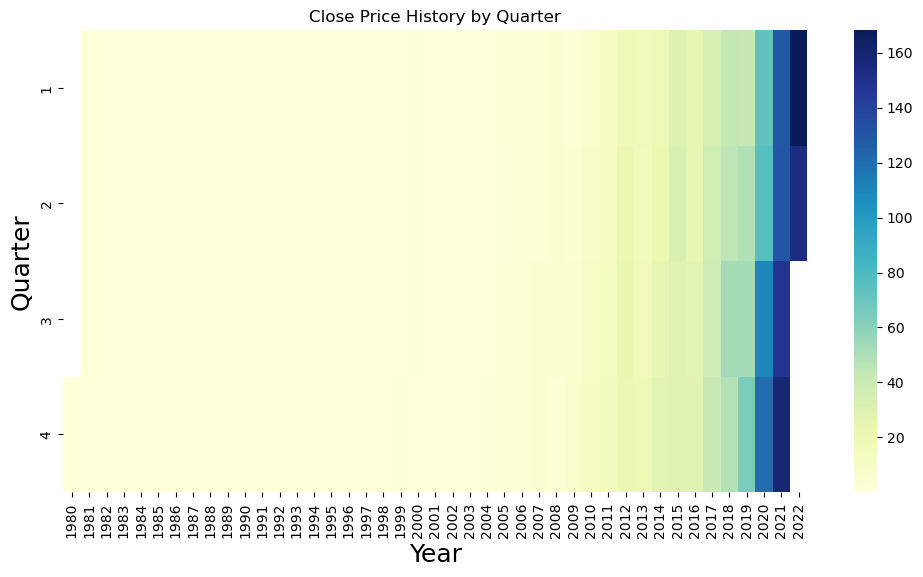

In [19]:
df['Quarter'] = df.index.quarter
df_pivot = df.pivot_table(index='Quarter', columns='Year', values='Close')
plt.figure(figsize=(12,6))
plt.title('Close Price History by Quarter')
sns.heatmap(df_pivot, annot=False, cmap='YlGnBu')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Quarter', fontsize=18)
plt.show()

C:\Users\Ranjan Alok\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


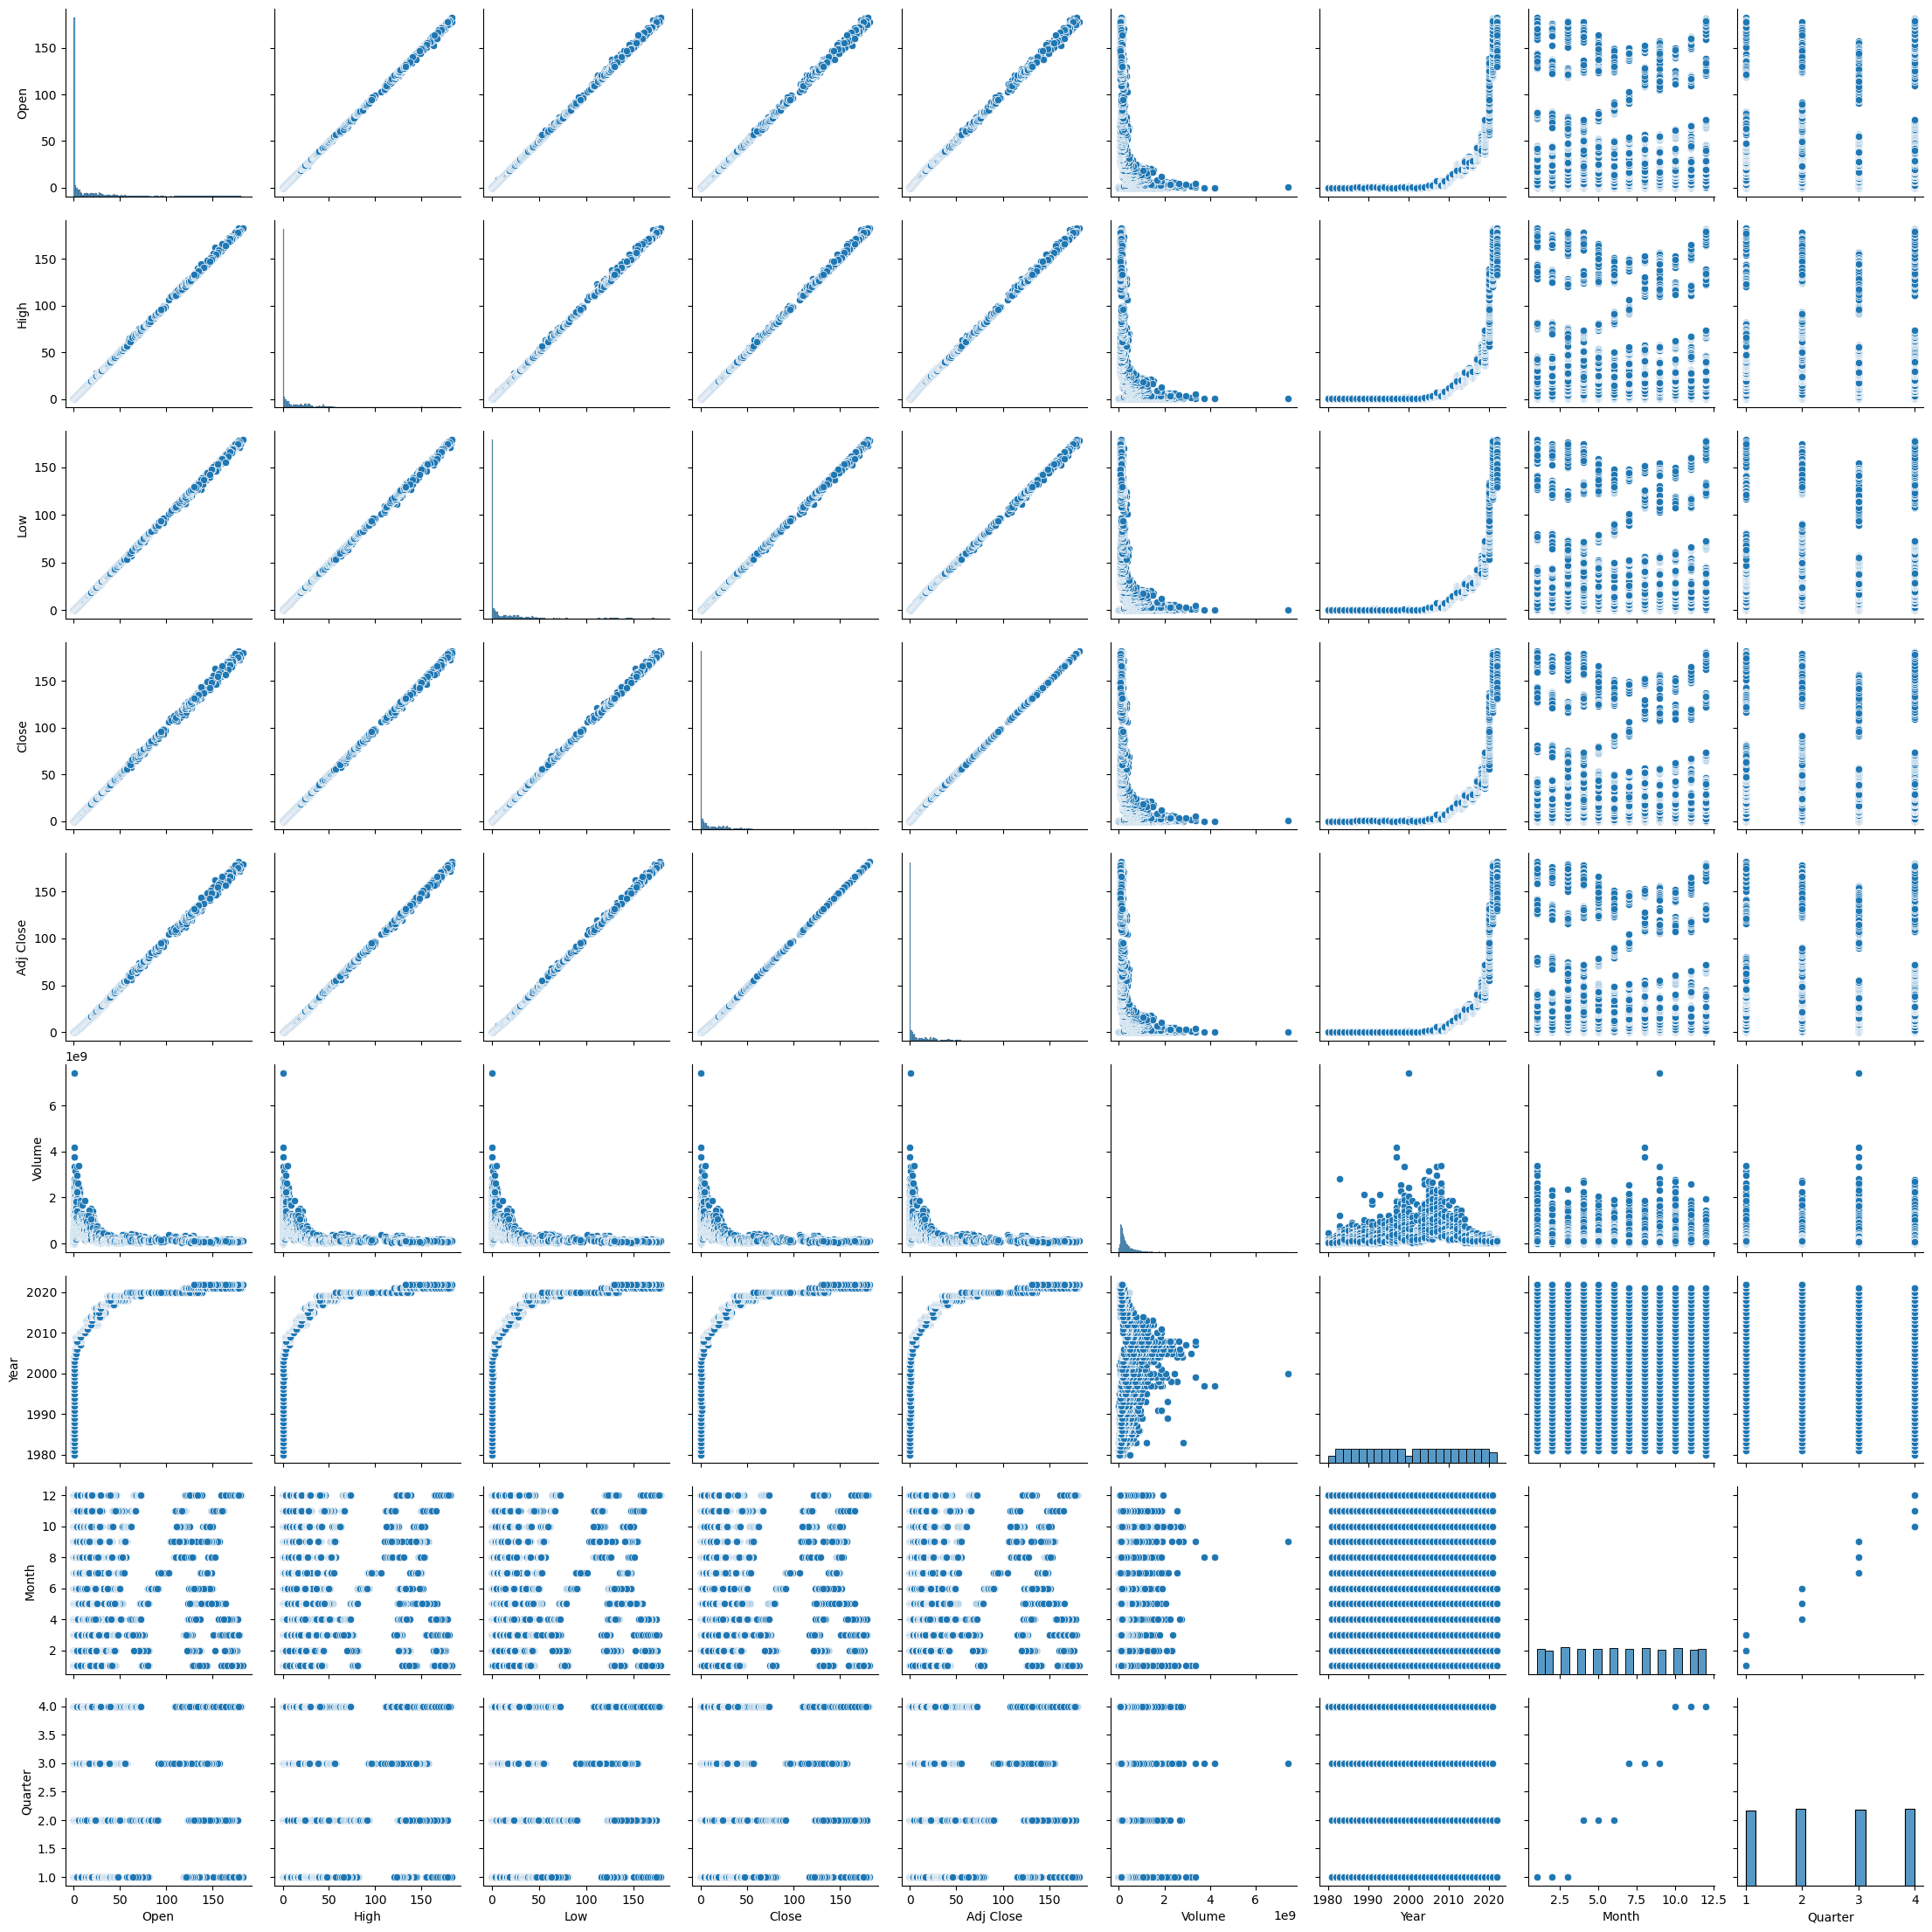

In [20]:
sns.pairplot(df)
plt.show()

1. Shows the pairwise relationships between all the features in the dataset
2. Indicates that the Open, High, Low, and Close prices are strongly positively correlated with each other, with a linear relationship
3. Also indicates that the Volume feature is not strongly correlated with any of the other features

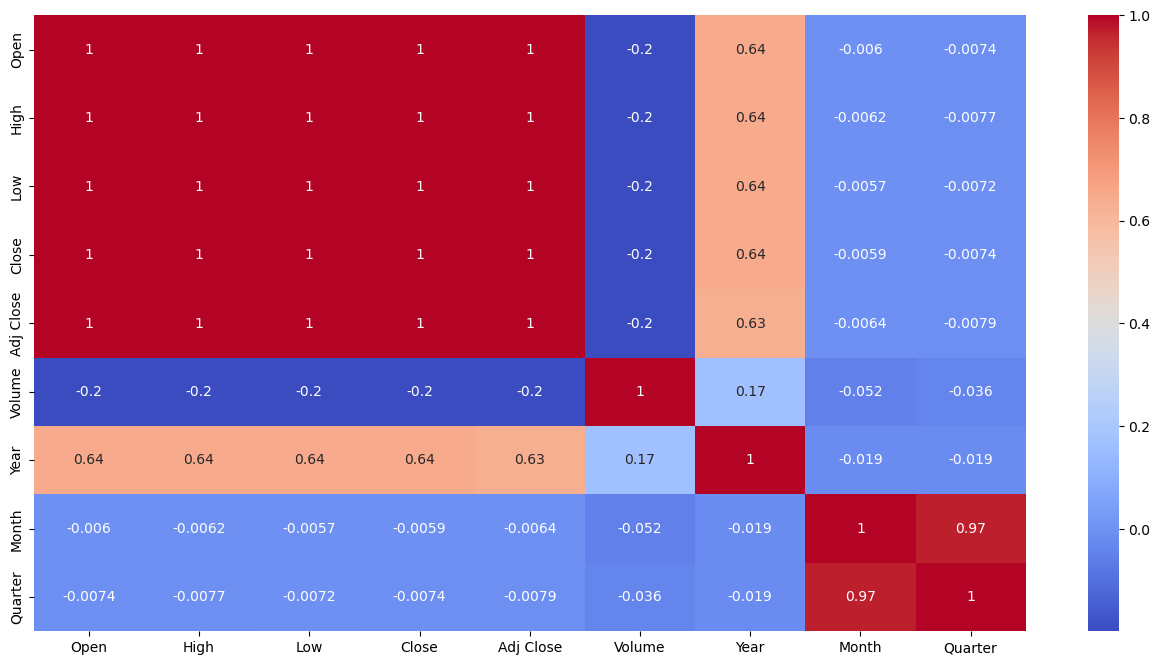

In [21]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show() 

Our assumption are adequat with the correlation heatmap

## Prepare the data
###  prepare the data for the prophet model

In [22]:
df = df.reset_index()
df = df.rename(columns={'Date':'ds', 'Close':'y'})
df = df[['ds', 'y']]

In [23]:
df = df.loc[df['ds'] >= '2020-01-01']
print("the head of the data is:")
print(df.head())

the head of the data is:
             ds          y
9847 2020-01-02  75.087502
9848 2020-01-03  74.357498
9849 2020-01-06  74.949997
9850 2020-01-07  74.597504
9851 2020-01-08  75.797501


In [26]:
scaler = MinMaxScaler()
df['y'] = scaler.fit_transform(df['y'].values.reshape(-1,1))

In [27]:
train_df = df.loc[df['ds'] <= '2021-12-31']
test_df = df.loc[df['ds'] > '2021-12-31']

In [28]:
%%time
# let's create the Prophet model
model = Prophet()
model.fit(train_df)

18:06:24 - cmdstanpy - INFO - Chain [1] start processing
18:06:31 - cmdstanpy - INFO - Chain [1] done processing


CPU times: total: 562 ms
Wall time: 8.84 s


In [29]:
predicitions = model.predict(test_df)

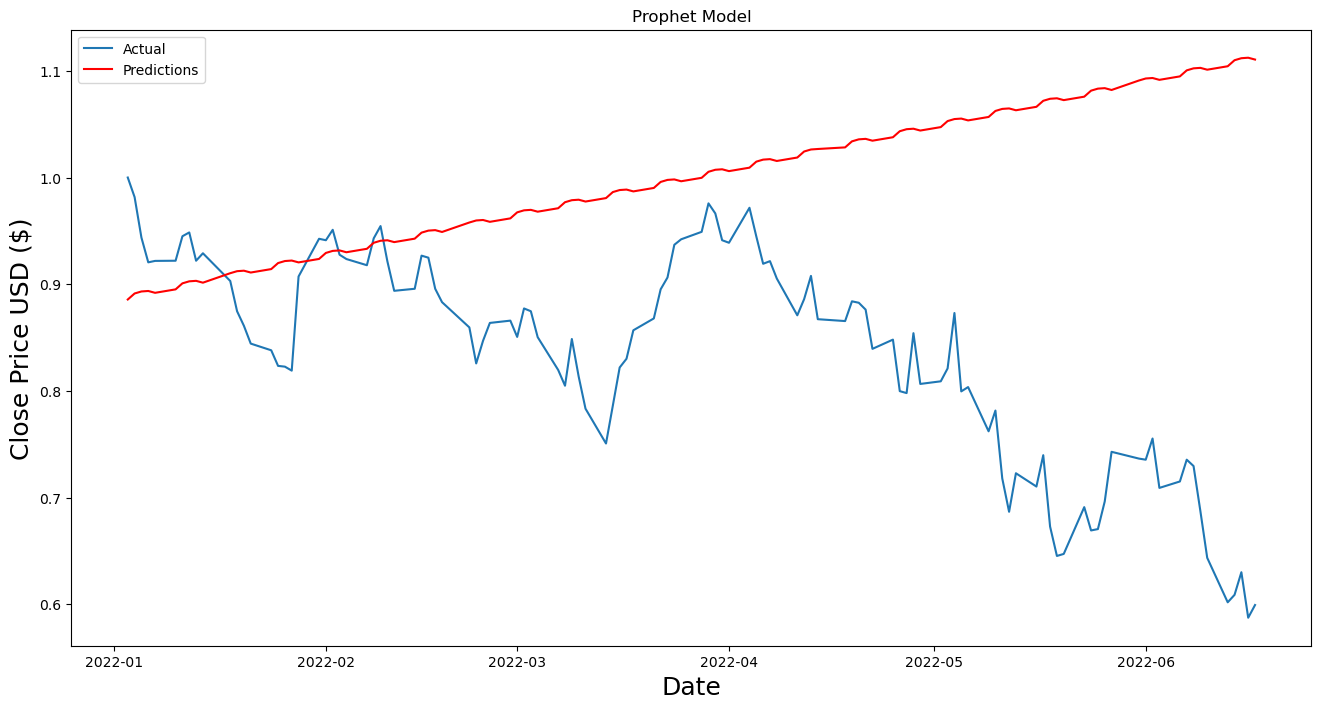

In [30]:
# let's plot the predictions and the actual values
plt.figure(figsize=(16,8))
plt.title('Prophet Model')
plt.plot(test_df['ds'], test_df['y'], label='Actual')
plt.plot(test_df['ds'], predicitions['yhat'], label='Predictions', color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()